In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import sys
import warnings
import datetime as dt
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading Dataset
df=pd.read_csv("NetFlix.csv")

In [3]:
# Cheacking first 5 rows of the dataset
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [4]:
# Checking last 5 rows of the data set
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973
4880,2021-10-11,639.419983,626.780029,633.200012,627.039978,2861200.0,627.039978


In [5]:
# Checking no. of rows and columns 
df.shape

(4881, 7)

In [6]:
# Reading column names 
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
# Description of data in the dataframe
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03,4881.000000
mean,107.003361,103.742674,105.388477,105.434149,1.679949e+07,105.434149
std,159.326383,154.662309,157.007060,157.073188,1.936794e+07,157.073188
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.977143,3.838571,3.901429,3.906429,6.286300e+06,3.906429
50%,22.261429,21.150000,21.524286,21.632856,1.082310e+07,21.632856
75%,127.430000,123.589996,125.949997,125.389999,2.015640e+07,125.389999
max,646.840027,630.859985,642.229980,639.099976,3.234140e+08,639.099976


In [8]:
# No. of missing values in the dataset
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
# Consize summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [10]:
#Removing rows that contains null values
df.dropna()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


Text(0.5, 1.0, 'Closing Price of NetFlix over the Years')

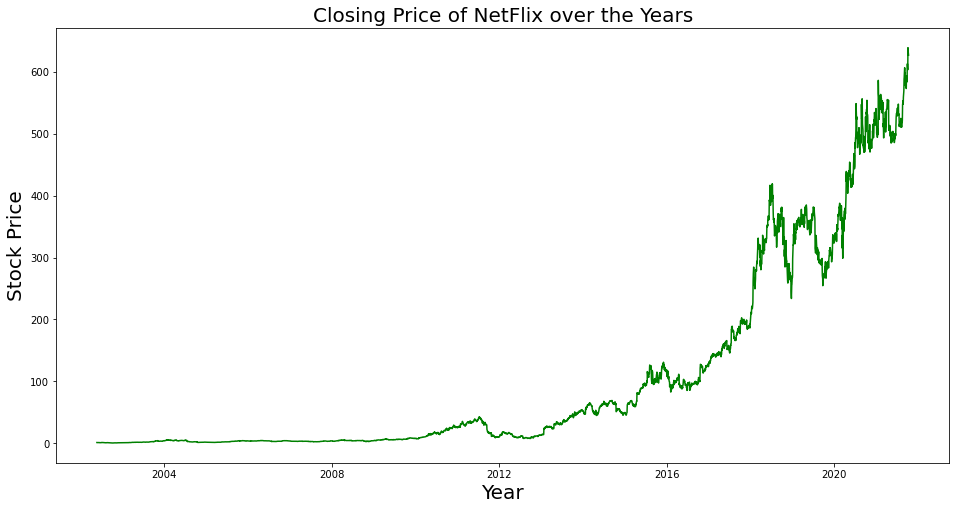

In [11]:
# Graph showing closing price of netflix over the years
df['Date'] = pd.to_datetime(df.Date,format='%Y/%m/%d %H:%M:%S')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Year',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Closing Price of NetFlix over the Years',size=20)

Text(0, 0.5, 'Volume')

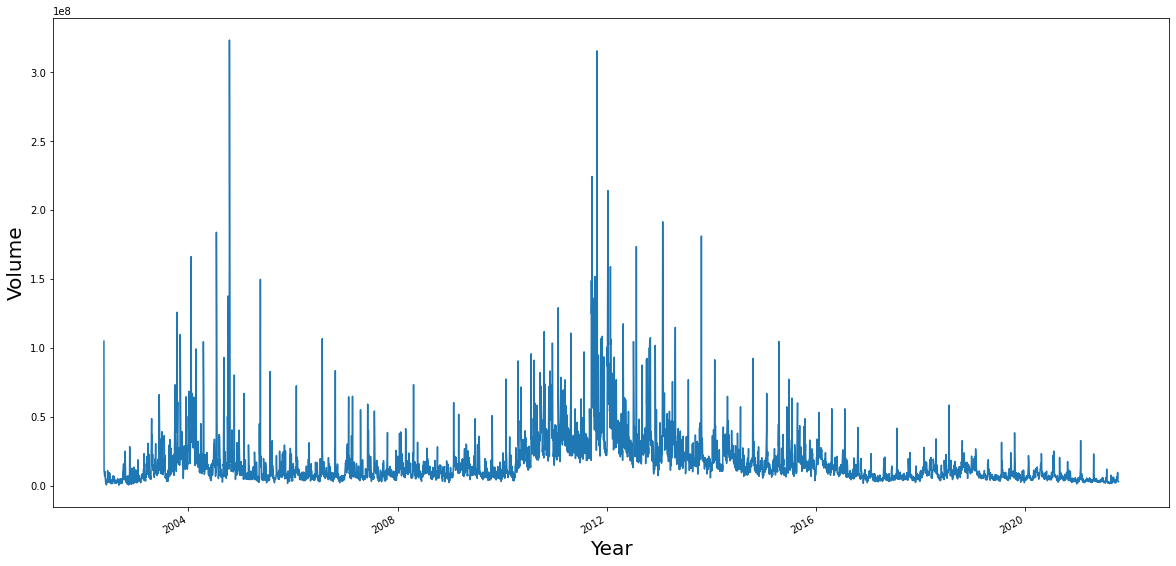

In [12]:
# Plot showing fluctuation in volume over the years 
df['Volume'].plot()
plt.xlabel('Year',size=20)
plt.ylabel('Volume',size=20)

Text(0, 0.5, 'Stock Price')

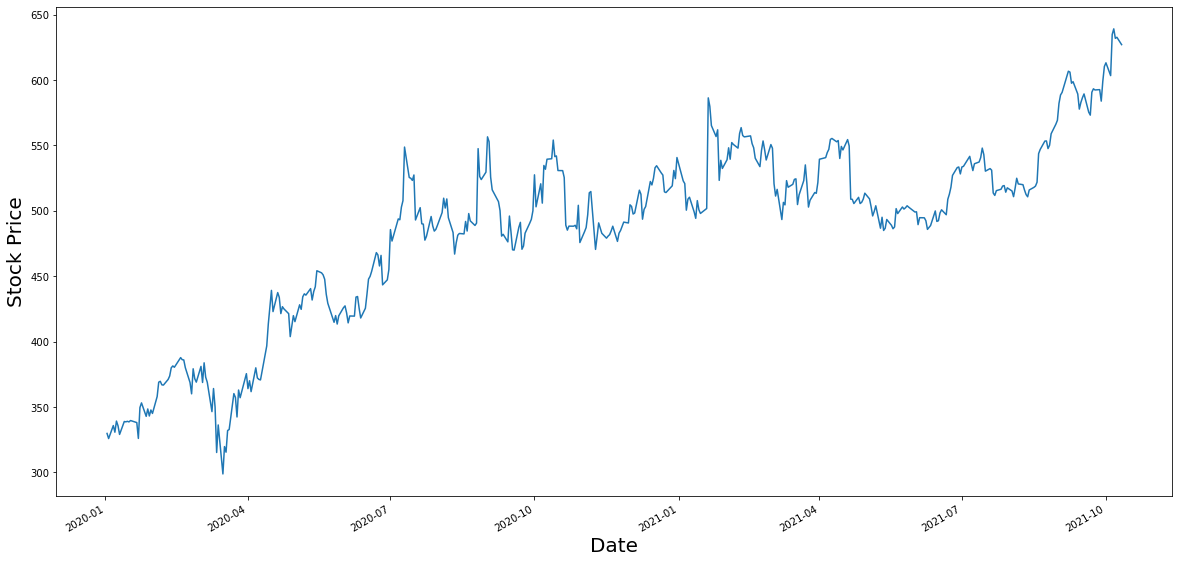

In [13]:
#Plot showing stock price during 2020-2021
df.loc['2020-01-01':'2022-12-31','Close'].plot()
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)

Text(0, 0.5, 'Volume')

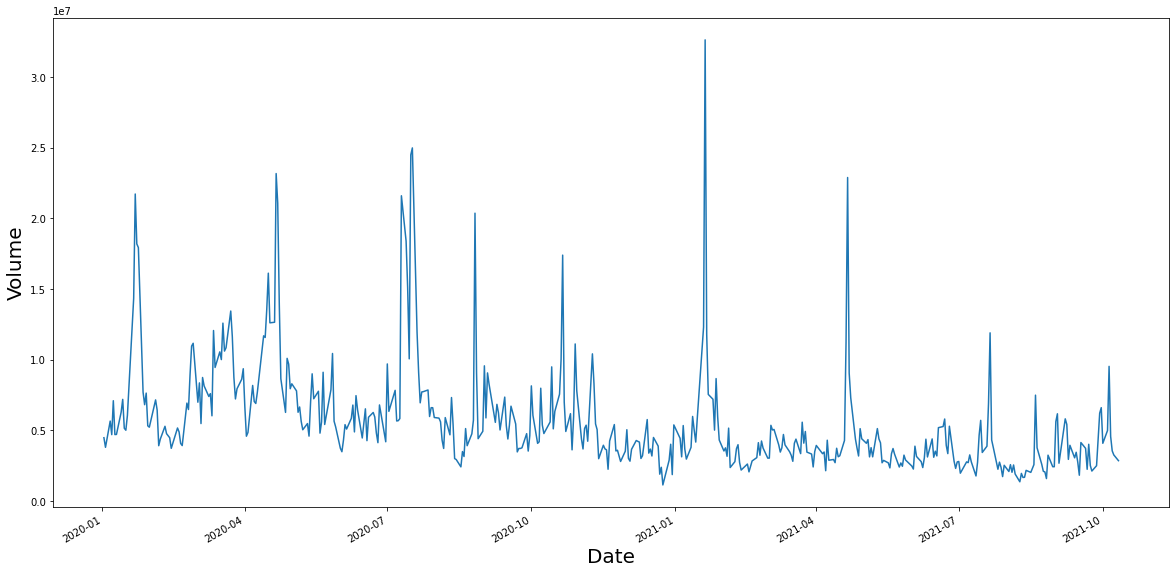

In [14]:
# plot showing max volume in feb-2021
df.loc['2020-01-01':'2022-12-31','Volume'].plot()
plt.xlabel('Date',size=20)
plt.ylabel('Volume',size=20)

Text(0, 0.5, 'Volume')

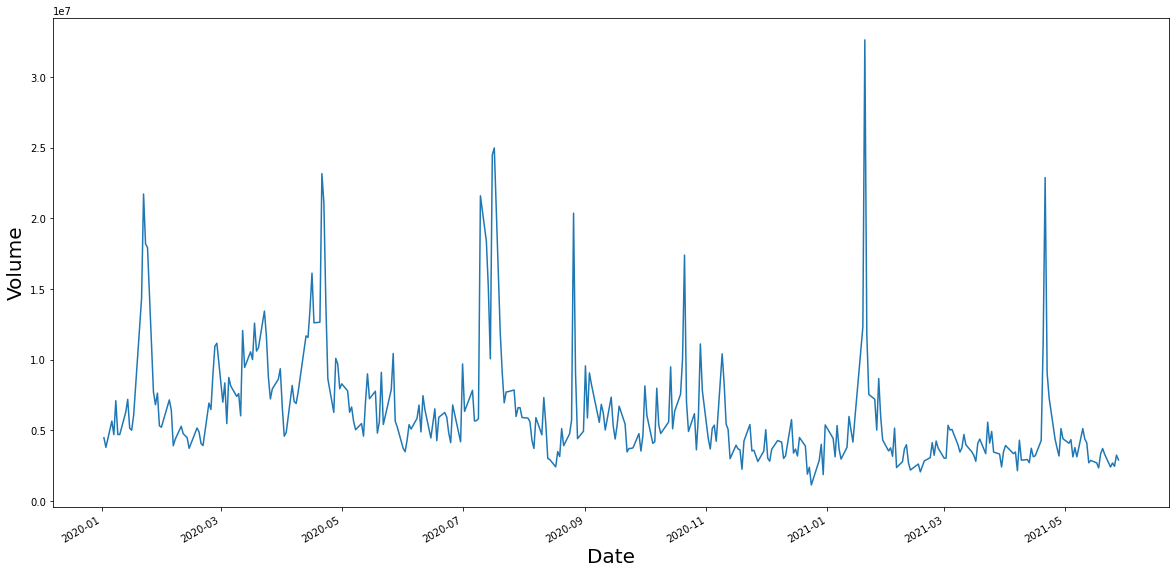

In [15]:
# Showing variation in volume during 2020-21(may)
df.loc['2020-01-01':'2021-05-31','Volume'].plot()
plt.xlabel('Date',size=20)
plt.ylabel('Volume',size=20)

Text(0, 0.5, 'Stock Price')

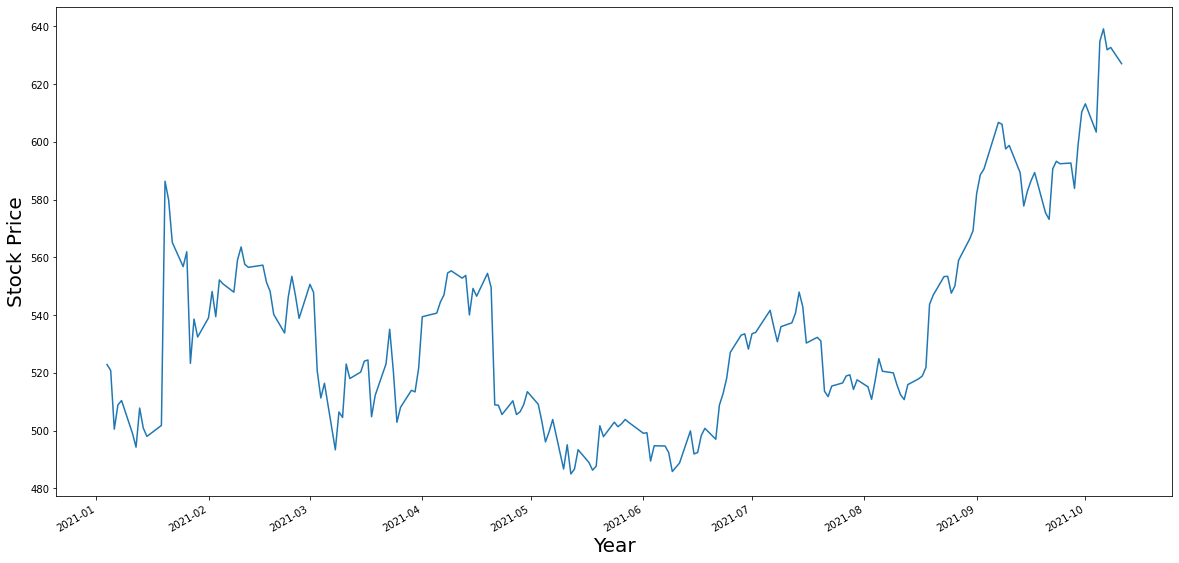

In [16]:
# Showing stock price during year 2021
df.loc['2021-01-01': , 'Close'].plot()
plt.xlabel('Year',size=20)
plt.ylabel('Stock Price',size=20)

In [17]:
# Adding new column as price1 which shows close values of the next date
df['Price1'] = df['Close'].shift(-1)

In [18]:
# Adding new column as priceDiff which is the differnce between column price1 & column close values 
df['PriceDiff']=df['Price1']-df['Close']

In [19]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Price1,PriceDiff
Date,,,,,,,,,
2002-05-23,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429,1.210000,0.013571
2002-05-24,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000,1.157143,-0.052857
2002-05-28,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143,1.103571,-0.053572
2002-05-29,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571,1.071429,-0.032142
2002-05-30,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429,1.076429,0.005000


In [20]:
# Adding new colun as DailyReturn which shows the daily returns from the netflix stocks
df['DailyReturn']=df['PriceDiff']/df['Close']

In [21]:
df['Direction']= [1 if df.loc[ei,'PriceDiff']>0 else -1 for ei in df.index]

In [22]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Price1,PriceDiff,DailyReturn,Direction
Date,,,,,,,,,,,
2002-05-23,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429,1.210000,0.013571,0.011343,1
2002-05-24,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000,1.157143,-0.052857,-0.043684,-1
2002-05-28,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143,1.103571,-0.053572,-0.046297,-1
2002-05-29,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571,1.071429,-0.032142,-0.029125,-1
2002-05-30,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429,1.076429,0.005000,0.004667,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998,639.099976,4.289978,0.006758,1
2021-10-06,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976,631.849976,-7.250000,-0.011344,-1
2021-10-07,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976,632.659973,0.809998,0.001282,1


In [23]:
# Adding new column as MA50 which shows the mean of the closing price of 50 days 
df['MA50']=df['Close'].rolling(50).mean()

In [24]:
# Adding new column as MA200 which shows the mean of the closing price of 200 days
df['MA200']=df['Close'].rolling(200).mean()

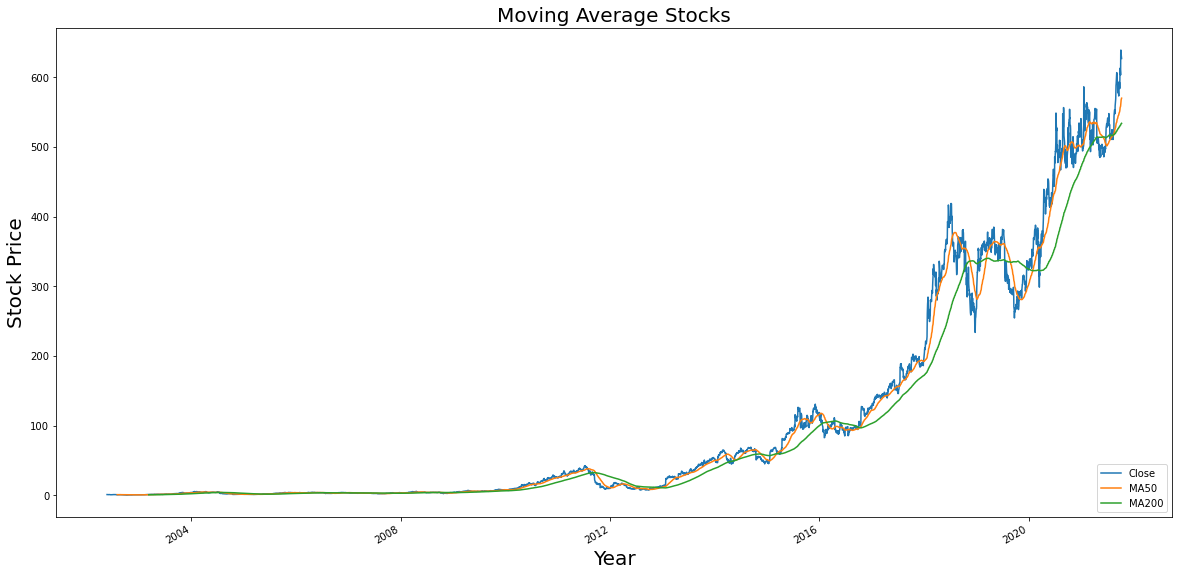

In [25]:
# Plot showing moving average stocks 
df['Close'].plot()
df['MA50'].plot()
df['MA200'].plot()
plt.xlabel('Year',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Moving Average Stocks',size=20)
plt.legend(['Close', 'MA50', 'MA200'], loc = 'lower right')

In [26]:
#MA50 is the fast signal
#MA200 is the slow signal
#since MA 50 is above ma 200, it signifies that stock price will move upwards for a while

<AxesSubplot:xlabel='Date'>

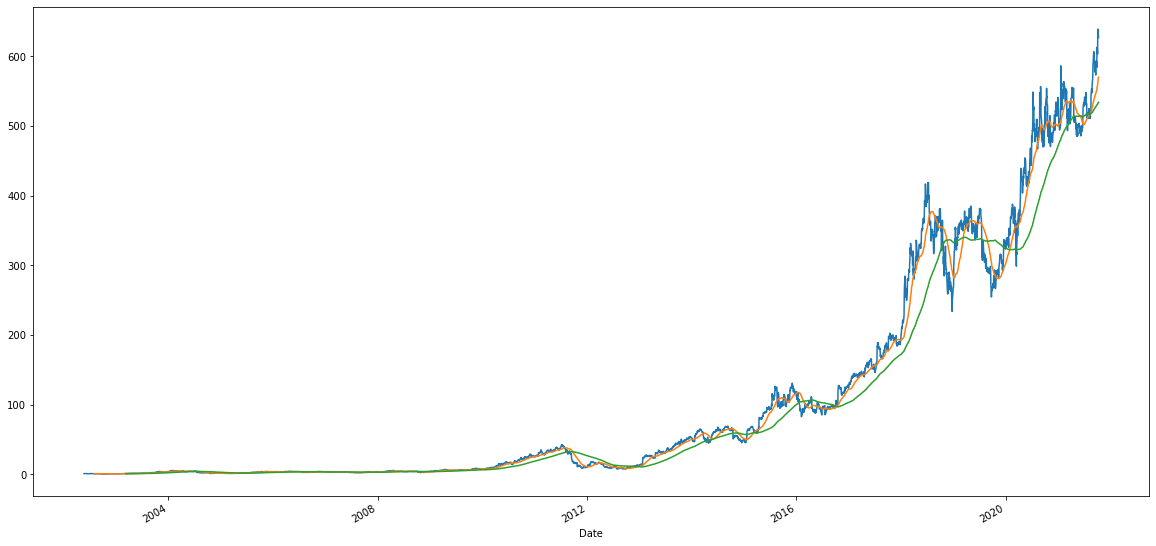

In [27]:
df['Adj Close'].plot()
df['MA50'].plot()

df['MA200'].plot()

<AxesSubplot:xlabel='Date'>

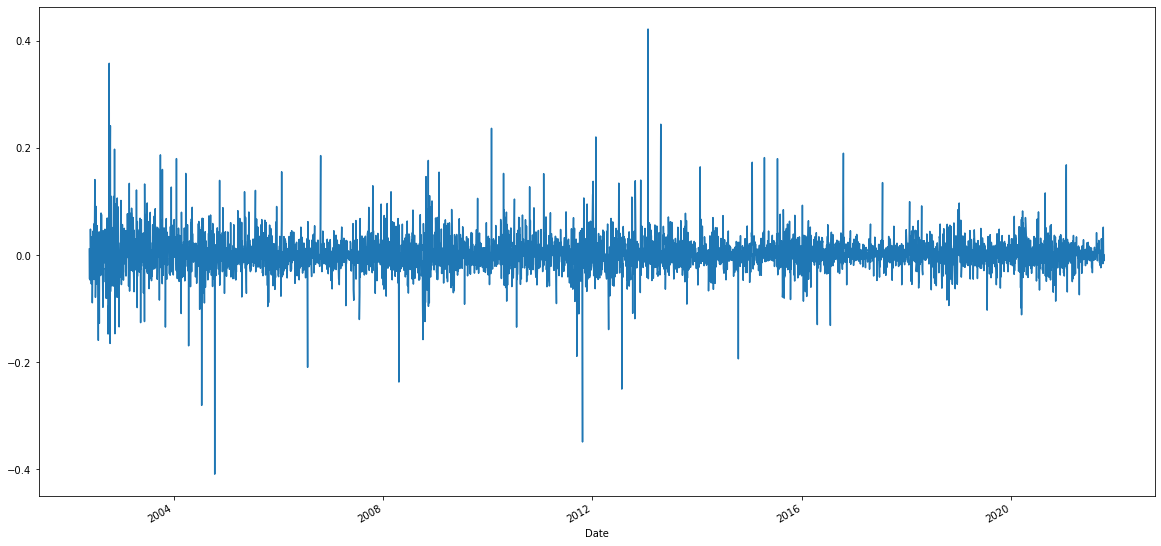

In [28]:
#Plot showing fluctuation in daily returns
df['DailyReturn'].plot()

<AxesSubplot:>

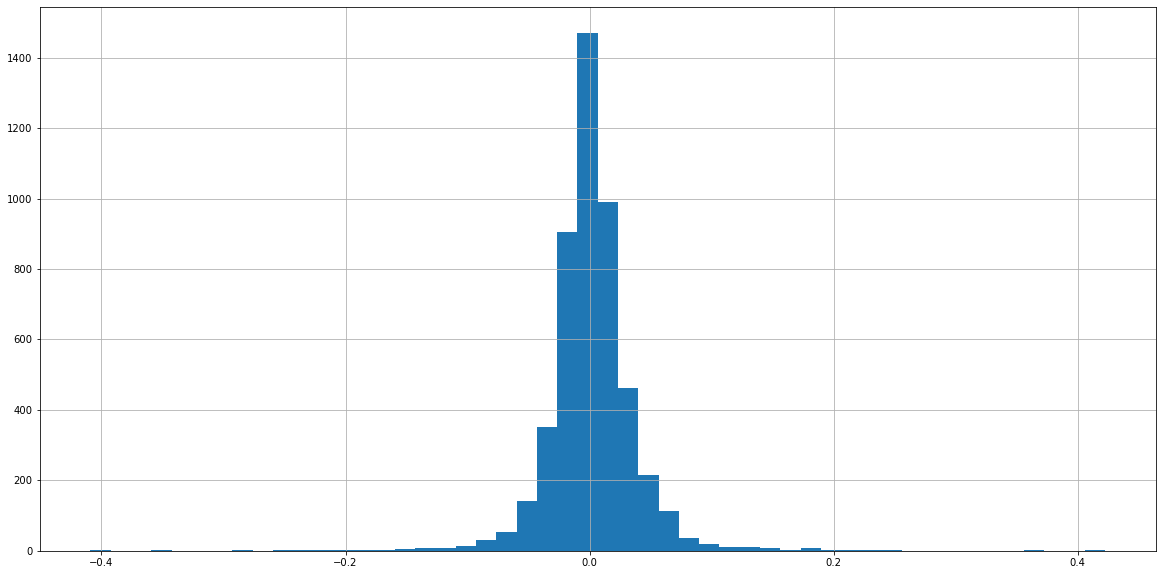

In [29]:
# Histogram plot showing daily returns
df['DailyReturn'].hist(bins=50)

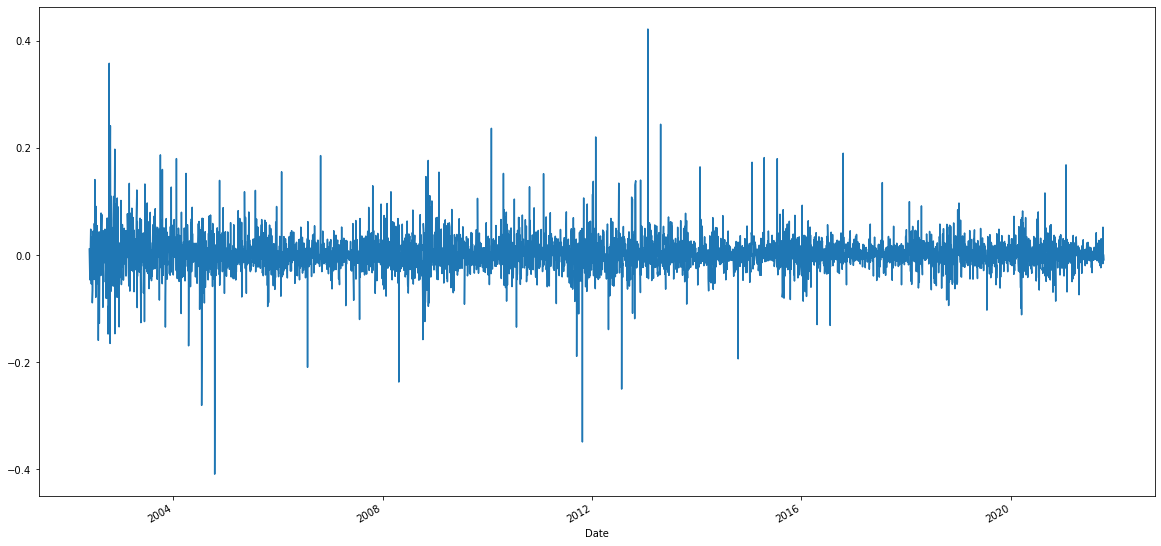

In [30]:
#Visualizing Daily Stock Returns
df['Returns'] = df['Close'].pct_change()
df['Returns'].plot()
plt.show()

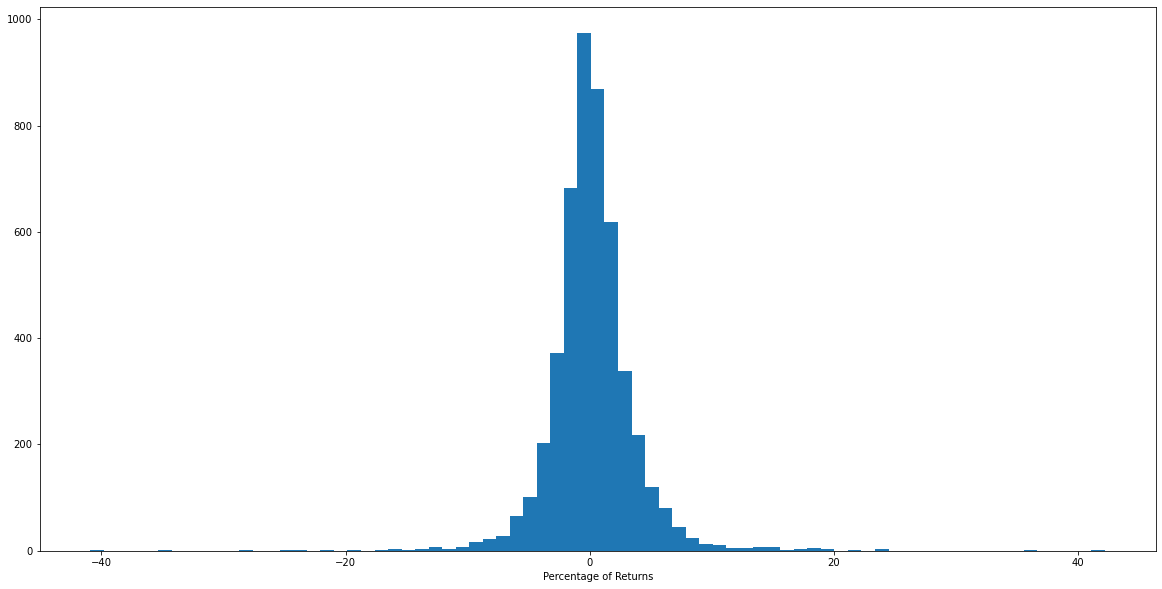

In [31]:
# Plot showing Range of returns
returns_percent = df['Returns'] * 100
plt.hist(returns_percent, bins=75)
plt.xlabel("Percentage of Returns")
plt.show()

In [32]:
# LSTM MODEL

In [33]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential

In [34]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [35]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

3902

In [36]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=300, batch_size=100, verbose=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

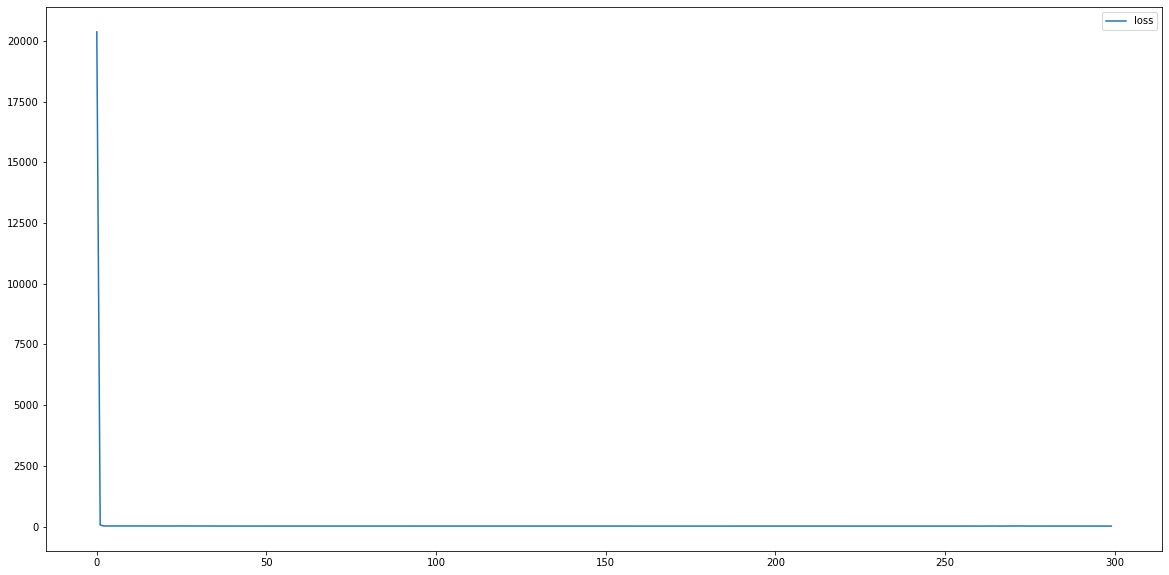

In [38]:
loss_plot = pd.DataFrame(model.history.history)
loss_plot[['loss']].plot()

In [39]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [40]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)


31/31 [==============================] - 1s 2ms/step


In [41]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

31/31 [==============================] - 0s 3ms/step
Train rmse: 4.215231162650399
Validation rmse: 9.052254901016541


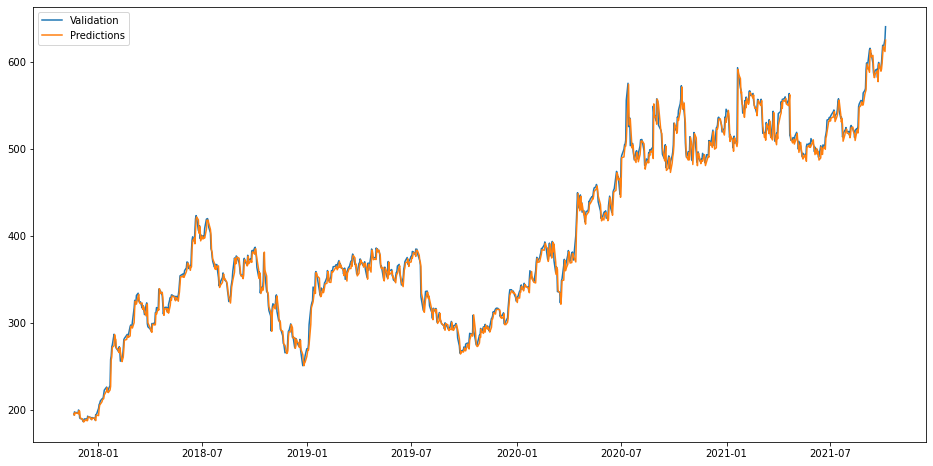

In [42]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [43]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,975.000000
mean,2.142793
std,8.799498
min,-48.553528
25%,-2.184555
50%,1.917603
75%,6.218658
max,85.759308


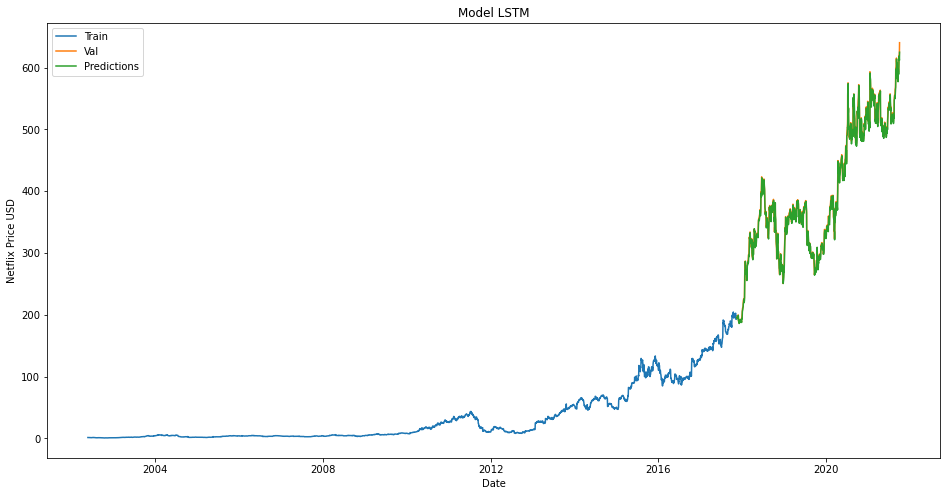

In [44]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Netflix Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()